# Description

Visualizing the promoters from Zhang (2023) DeepSEED, their expression, and the distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns

In [2]:
df_laco = pd.read_csv('../../Data/Zhang (DeepSEED)/ecoli_mpra_3_laco.csv')
df_laco.head()

,realA,realB,expr
0,MMMMMMMMMMMMTCGGCTAGCCAGATTGTTGTGGTCTGATTAAAGT...,TCCCACTATTTGTCGGCTAGCCAGATTGTTGTGGTCTGATTAAAGT...,2.346474
1,MMMMMMMMMMMMMMMMMMGTGACAAATCGTGACACAATATCGTCAC...,CTTTTTTTTGAATAAATTGTGACAAATCGTGACACAATATCGTCAC...,3.501752
2,GGTTCTACCGAACTTGTCATGTAAATTAAAAAAATAAAMMMMMMMM...,GGTTCTACCGAACTTGTCATGTAAATTAAAAAAATAAAAACGTGTT...,5.566020
3,MMMMMMMMMMMMMACTGGCGCTTCTGCTGAAAAAAAGTCCATGGTG...,TCGCTCTCGGAACACTGGCGCTTCTGCTGAAAAAAAGTCCATGGTG...,-0.640324
4,MMMMMMMMMMMMMMMMMMMMMMMTCATAGATTAAGAATTTTCCTGA...,GCTTTAGAAACAAAAGGGACGTTTCATAGATTAAGAATTTTCCTGA...,-2.138048


In [3]:
df_h35_h10 = pd.read_csv('../../Data/Zhang (DeepSEED)/ecoli_mpra_-10_-35.csv')
df_h35_h10.head()

,realA,realB,expr
0,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,CTTTTTTTTGAATAAATTGTGACAAATCGTGACACAATATCGTCAC...,3.501752
1,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,TCGCTCTCGGAACACTGGCGCTTCTGCTGAAAAAAAGTCCATGGTG...,-0.640324
2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,GCTTTAGAAACAAAAGGGACGTTTCATAGATTAAGAATTTTCCTGA...,-2.138048
3,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,TATAACAACTTGTAGTTATCTCAATATAGTTATCGCTAAGTGCAAG...,-0.206067
4,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,AAGCAGACTTGTCTTCAAGTTGCTAAGGGGTTATTATATAATTTTC...,4.445758


In [4]:
# for each sequence (realB) in df_laco, find the corresponding sequence in df_h35_h10
# print the number of shared and unshared sequences
shared_count = 0
unshared_count = 0
for seq in df_laco['realB']:
    if seq in df_h35_h10['realB'].values:
        shared_count += 1
    else:
        unshared_count += 1
print(f"Number of shared sequences: {shared_count}")
print(f"Number of unshared sequences: {unshared_count}")

Number of shared sequences: 4936
Number of unshared sequences: 984


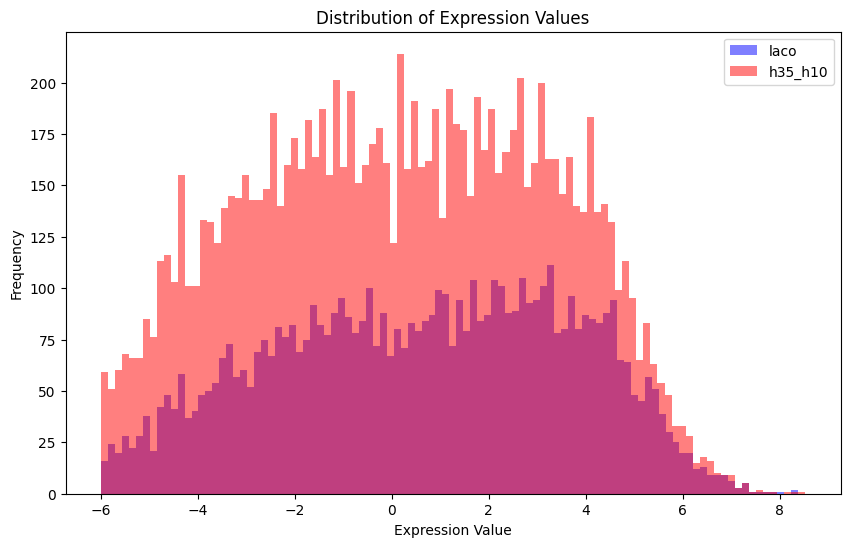

In [5]:
# graph the distributions of expression values

plt.figure(figsize=(10, 6))
plt.hist(df_laco['expr'], bins=100, alpha=0.5, color='blue', label='laco')
plt.hist(df_h35_h10['expr'], bins=100, alpha=0.5, color='red', label='h35_h10')
plt.xlabel('Expression Value')
plt.ylabel('Frequency')
plt.title('Distribution of Expression Values')
plt.legend()
plt.show()

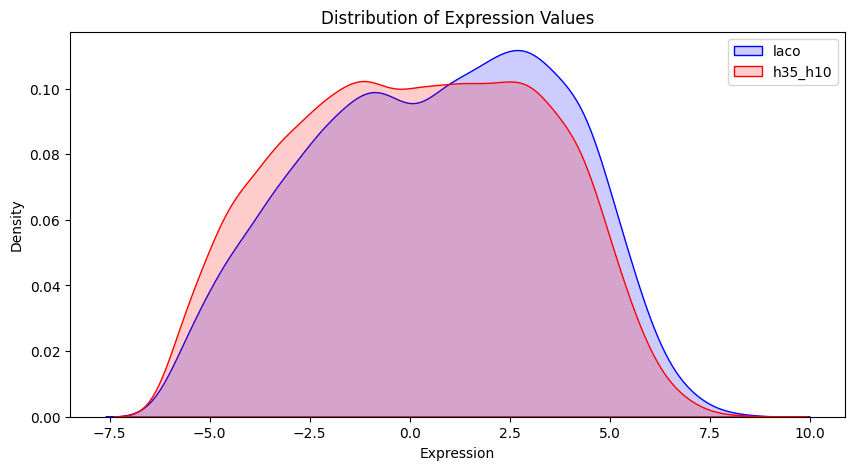

In [6]:
# graph the density of expression values

plt.figure(figsize=(10, 5))
sns.kdeplot(df_laco['expr'], label='laco', color='blue', fill=True, alpha=0.2)
sns.kdeplot(df_h35_h10['expr'], label='h35_h10', color='red', fill=True, alpha=0.2)
plt.xlabel('Expression')
plt.ylabel('Density')
plt.title('Distribution of Expression Values')
plt.legend()
plt.show()


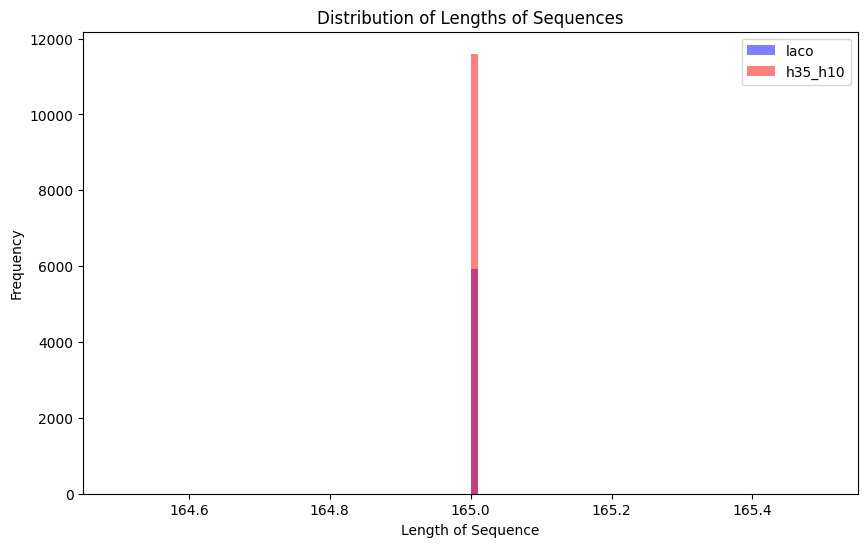

In [7]:
# graph the distributions of lengths of the sequences

plt.figure(figsize=(10, 6))
plt.hist(df_laco['realB'].str.len(), bins=100, alpha=0.5, color='blue', label='laco')
plt.hist(df_h35_h10['realB'].str.len(), bins=100, alpha=0.5, color='red', label='h35_h10')
plt.xlabel('Length of Sequence')
plt.ylabel('Frequency')
plt.title('Distribution of Lengths of Sequences')
plt.legend()
plt.show()

In [8]:
def hamming_distance(seq1, seq2):
    return np.sum(np.array(list(seq1)) != np.array(list(seq2)))

def average_hamming_distance(df1, df2):
    distances = []
    for seq1 in df1['realB']:
        for seq2 in df2['realB']:
            distances.append(hamming_distance(seq1, seq2))
    return np.mean(distances)

In [ ]:
# calculate the average hamming distance between sequences in the same dataset

n = 300

avg_hamming_laco = average_hamming_distance(
    df_laco.sample(n, random_state=1),
    df_laco.sample(n, random_state=1)
)
print(f'Average Hamming Distance (laco): {avg_hamming_laco}')

avg_hamming_h35_h10 = average_hamming_distance(
    df_h35_h10.sample(n, random_state=1),
    df_h35_h10.sample(n, random_state=1)
)
print(f'Average Hamming Distance (h35_h10): {avg_hamming_h35_h10}')

In [ ]:
# calculate the average hamming distance between the datasets

n = 300

avg_distance = average_hamming_distance(
    df_laco.sample(n, random_state=1),
    df_h35_h10.sample(n, random_state=1)
)

print(f'Average Hamming Distance: {avg_distance}')

Average Hamming Distance: 120.41685555555556
